# WhatsApp Group Chat Analysis

#### I have exported one of my group chats from whatsapp which has data from August 2019 till September 2020. I will be converting the .txt file to a dataframe and also to .csv format.   

In [10]:
#importing all the necessary libraries
import numpy as np,pandas as pd, matplotlib.pyplot as plt
import warnings, seaborn as sns
warnings.filterwarnings('ignore')
import datetime

### Reading the .txt file 

I have added comments for each line to explain what it does

In [11]:
def read_file(file):
    '''Reads Whatsapp text file into a list of strings'''
    x = open(file,'r', encoding = 'utf-8') #Opens the text file into x
    y = x.read() #The entire file is read into a huge chunk of string 
    #The splitline method converts the chunk of string into a list of strings line by line
    content = y.splitlines() 
    return content

chat = read_file('WhatsappChat.txt')

In [12]:
#checking the length of our chat variable
len(chat) 

18129

### We have the entire file in the chat variable stored line by line. Each new message line is in the format as below:
'7/8/19, 6:47 PM - Vikram: Hi' 
### In the following steps we will be extracting the date, time, user and messages into separate lists

#### Point to be noted:
- Few messages have more than 1 line, in such cases the new line will not follow the above format. It will only have the message lines. I have deleted the extra lines of such messages and Kept only the one line.

In [13]:
#Checking if the date format is appropriate
datetime.datetime.strptime(chat[0].split(',')[0], '%m/%d/%y') 

datetime.datetime(2017, 5, 1, 0, 0)

In [14]:
# Function to extract date and lines without date are removed. 
for i in range(len(chat)):
  try:
    datetime.datetime.strptime(chat[i].split(',')[0], '%m/%d/%y') #Converts string date into a date object
  except ValueError: #Returns an error if the string is not a datetime object (i.e multiple line messages)
    chat[i-1] = chat[i-1] + ' ' + chat[i] #Appends the line to the previous line
    chat[i] = "NA" #Replace the unwanted text element with 'NA'
    
#Handling the messages having more than 2 lines 
for i in range(len(chat)):
  if chat[i].split(' ')[0] == 'NA': #checking the lines with first word as 'NA' - indicates that the message had more than 2 lines
    chat[i] = 'NA'
    
while True:
    try:
        chat.remove("NA") # remove all the lines with 'NA'
    except ValueError:
        break
        
len(chat) #This value will have reduced now.

14811

In [15]:
date = [text.split(',')[0] for text in chat]  #Extracting the DATE into date list
date

['5/1/17',
 '5/1/17',
 '7/8/19',
 '7/8/19',
 '7/8/19',
 '7/8/19',
 '7/8/19',
 '7/8/19',
 '7/8/19',
 '7/8/19',
 '7/8/19',
 '7/8/19',
 '7/8/19',
 '7/9/19',
 '7/9/19',
 '7/9/19',
 '7/9/19',
 '7/9/19',
 '7/9/19',
 '7/9/19',
 '7/9/19',
 '7/9/19',
 '7/9/19',
 '7/9/19',
 '7/9/19',
 '7/9/19',
 '7/9/19',
 '7/9/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/10/19',
 '7/11/19',
 '7/11/19',
 '7/11/19',
 '7/11/19',
 '7/11/19',
 '7/11/19',
 '7/11/19',
 '7/11/19',
 '7/11/19',
 '7/11/19',
 '7/11/19',
 '7/11/19',
 '7/11/19',
 '7/11/19',
 '7/11/19',
 '7/11/19',
 '7/12/19',
 '7/12/19',
 '7/12/19',
 '7/12/19',
 '7/12/19',
 '7/12/19',
 '7/12/19',
 '7/12/19',
 '7/12/19',
 '7/12/19',
 '7/12/19',
 '7/12/19',
 '7/12/19',
 '7/12/19',
 '7/12/19',
 '7/12/19',
 '7/12/1

In [16]:
## Extracting the time from each line
time = [chat[i].split(',')[1].split('-')[0] for i in range(len(chat))]
time = [s.strip(' ') for s in time] # Remove spacing  

## Extracting the name of the user from each line
name = [chat[i].split('-')[1].split(':')[0] for i in range(len(chat))]

## Please note few lines line 'Vikram added Priya to the group' won't have message content 
## and such lines might have got added to the name section instead

In [17]:
## Extracting the message from each line
content = []
for i in range(len(chat)):
  try:
    content.append(chat[i].split(':')[2])
  except IndexError:
    content.append('Missing Text')    #few lines line 'Vikram added Priya to the group' won't have message content

### Creating a DATAFRAME combining all the lists

In [18]:
df = pd.DataFrame(list(zip(date, time, name, content)), columns = ['Date', 'Time', 'Name', 'Message'])

In [ ]:
df[df['Message'] == 'Missing Text']

<img src="MissingText.PNG"/>

In [19]:
#Removing the rows with missing text because only few of them are there
df = df[df['Message'] != 'Missing Text']

In [20]:
df['Message']=df['Message'].str.replace('<Media omitted>','Media File')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14802 entries, 2 to 14810
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     14802 non-null  object
 1   Time     14802 non-null  object
 2   Name     14802 non-null  object
 3   Message  14802 non-null  object
dtypes: object(4)
memory usage: 578.2+ KB


In [22]:
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14802 entries, 2 to 14810
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     14802 non-null  datetime64[ns]
 1   Time     14802 non-null  object        
 2   Name     14802 non-null  object        
 3   Message  14802 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 578.2+ KB


In [24]:
#df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p')
df['Time']=pd.to_datetime(df['Time'], format='%I:%M %p').dt.hour

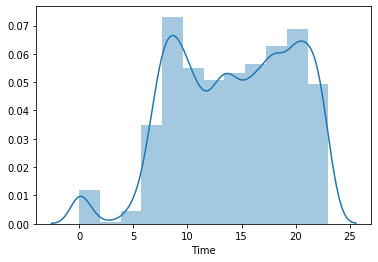

In [26]:
#df['hour']=df.Time.apply(lambda x: int(x.split(':')[0]))
sns.distplot(df.Time,bins=12)
plt.show()

#### From the above plot, it's evident that in the interval of 8-10 is when the group is most active.

In [27]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14802 entries, 2 to 14810
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     14802 non-null  datetime64[ns]
 1   Time     14802 non-null  int64         
 2   Name     14802 non-null  object        
 3   Message  14802 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 578.2+ KB


### Converting the Dataframe to CSV

In [95]:
df.to_csv('chat1.csv',encoding='utf-8')

In [28]:
df[['Name','Message']].groupby('Name').count().sort_values(by='Message', ascending=False)

,Message
Name,
Rakhee Chechi,2435
Reghu Velliachan,2073
Aswathi,1969
Rahul Bro Kerala,1796
Akhil Chetai 🤓,1577
Krishnan Kunjachan Jio,1203
Achan,1137
Lechu Ettathi BLORE,776
Bindu Nasik IDEA,700


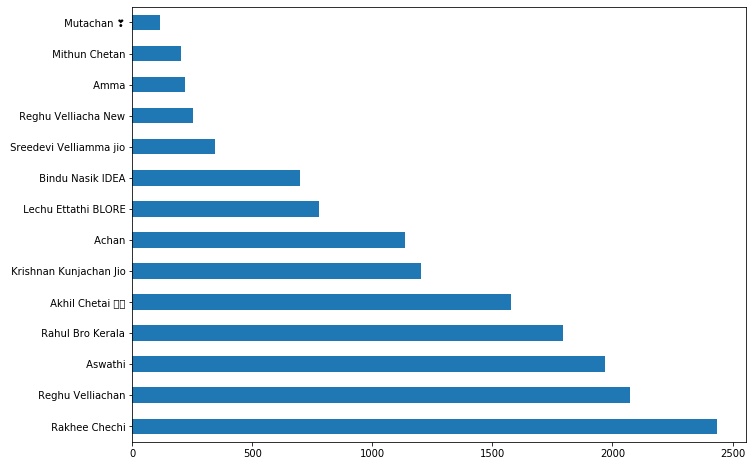

In [29]:
plt.figure(figsize=[11,8])
df.Name.value_counts().plot.barh()
plt.show()

### From the above plot, it's evident that 'Rakhee Chechi' has been the most active member of the group.

#### Top 10 Days on which maximum messages were exchanged

In [32]:
df[['Message','Date']].groupby('Date').count().sort_values(by='Message', ascending=False).head(10)

,Message
Date,
2020-04-14,208
2020-04-11,133
2020-04-21,126
2019-11-16,123
2019-11-24,122
2020-04-30,122
2020-06-05,120
2019-11-20,113
2020-09-05,110


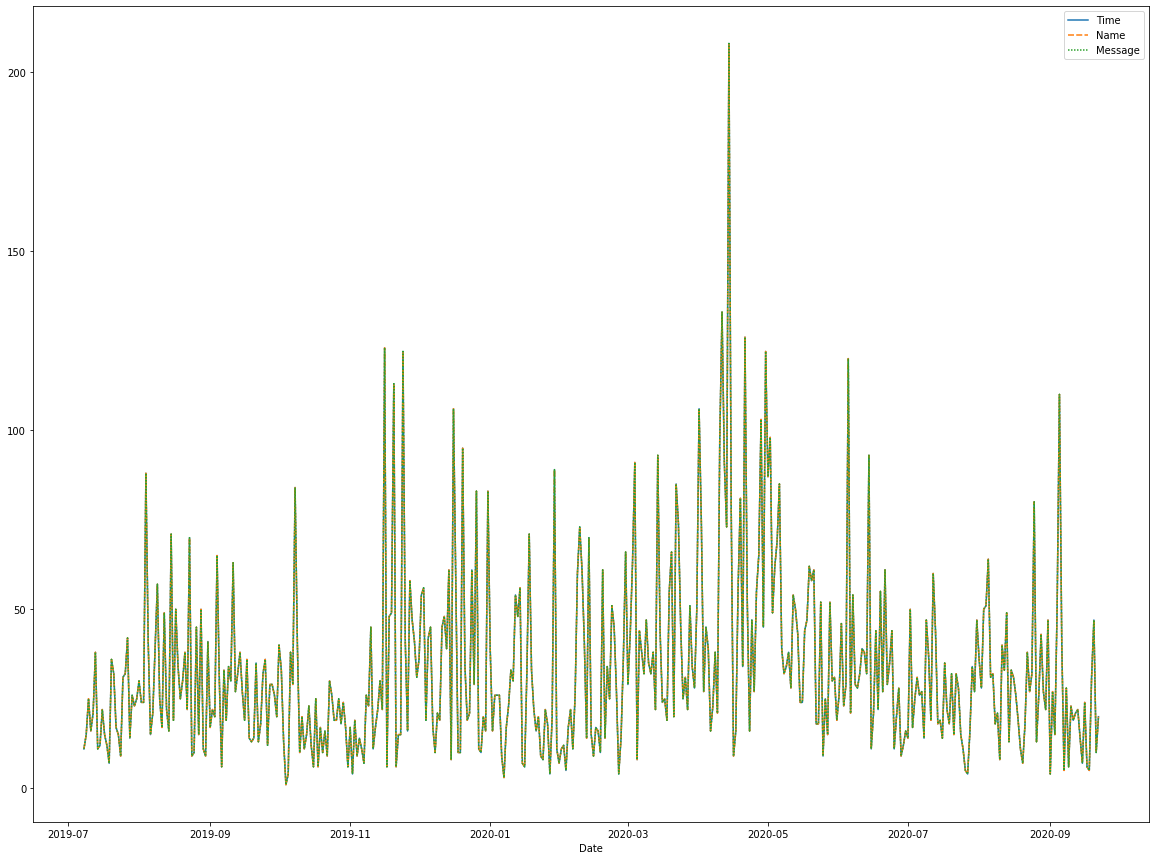

In [33]:
#Trend of the messages exchanged in the group
plt.figure(figsize=[20,15])
sns.lineplot(data=df.groupby('Date').count())
plt.show()

#### 5 Days on which minimum messages were recieved

In [34]:
#List of 5 Days on which minimum messages were recieved
df[['Message','Date']].groupby('Date').count().sort_values(by='Message', ascending=False).tail(5)

,Message
Date,
2020-09-01,4
2020-01-27,4
2019-10-05,4
2020-01-07,3
2019-10-04,1


In [35]:
df['month_year'] = pd.to_datetime(df['Date']).dt.to_period('M')

In [36]:
df[['month_year']].head()

,month_year
2,2019-07
3,2019-07
4,2019-07
5,2019-07
6,2019-07


<Figure size 1800x1440 with 0 Axes>

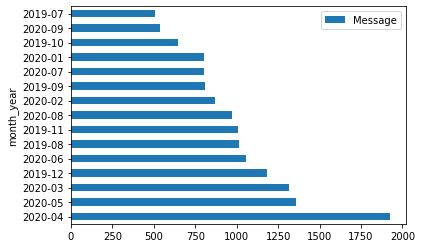

In [42]:
plt.figure(figsize=[25,20])
df[['month_year','Message']].groupby('month_year').count().sort_values(by='Message', ascending=False).plot(kind='barh')
plt.show()

### The above plot tells us that in the month of April in 2020, maximum messages were exchanged in the group.